<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández

**Fecha:** 28 de enero del 2021.

**Expediente** : if722627
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase: 30

## Valuación opciones

> Utilizar lo visto en la **Clase22_Valuación Opciones** para simular precios y encontrar la prima de opciones tipo "put"

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

#### ``Carlos Daniel Pérez Hernández``

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [49]:
# Descargamos Opciones
# MCD McDonald's Corporation

mcd = web.YahooOptions('MCD')
mcd_opt = mcd.get_all_data().reset_index()
mcd_opt.set_index('Expiry')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-06-18,70.0,call,MCD210618C00070000,...,2021-04-27 23:59:51,2021-02-24 20:37:30,"{'contractSymbol': 'MCD210618C00070000', 'stri..."
2021-06-18,70.0,put,MCD210618P00070000,...,2021-04-27 23:59:51,2021-01-04 17:25:47,"{'contractSymbol': 'MCD210618P00070000', 'stri..."
2022-01-21,70.0,call,MCD220121C00070000,...,2021-04-27 23:59:51,2021-02-25 20:59:12,"{'contractSymbol': 'MCD220121C00070000', 'stri..."
2022-01-21,70.0,put,MCD220121P00070000,...,2021-04-27 23:59:51,2021-04-07 13:35:03,"{'contractSymbol': 'MCD220121P00070000', 'stri..."
2021-06-18,75.0,call,MCD210618C00075000,...,2021-04-27 23:59:51,2020-11-27 17:03:44,"{'contractSymbol': 'MCD210618C00075000', 'stri..."
...,...,...,...,...,...,...,...
2022-01-21,340.0,call,MCD220121C00340000,...,2021-04-27 23:59:51,2021-04-26 16:37:22,"{'contractSymbol': 'MCD220121C00340000', 'stri..."
2022-06-17,340.0,call,MCD220617C00340000,...,2021-04-27 23:59:51,2021-04-20 15:22:49,"{'contractSymbol': 'MCD220617C00340000', 'stri..."
2023-01-20,340.0,call,MCD230120C00340000,...,2021-04-27 23:59:51,2021-04-20 15:57:32,"{'contractSymbol': 'MCD230120C00340000', 'stri..."


In [50]:
# Saber el último precio con el que cerro apple el dia de hoy
mcd_opt.Underlying_Price[0]

234.85

In [51]:
# Datos de la opcion
mcd_opt.loc[0, 'JSON']

{'contractSymbol': 'MCD210618C00070000',
 'strike': 70.0,
 'currency': 'USD',
 'lastPrice': 143.85,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 2,
 'openInterest': 0,
 'bid': 153.0,
 'ask': 157.15,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1614199050,
 'impliedVolatility': 1.0000000000000003e-05,
 'inTheMoney': True}

In [52]:
# Consultamos todas las opciones de tipo put en la fecha '2021-06-18'

fecha = '2021-06-18'
put_mcd = mcd_opt.loc[(mcd_opt.Expiry== fecha) & (mcd_opt.Type=='put')]

put_mcd

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,70.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-01-04 17:25:47,"{'contractSymbol': 'MCD210618P00070000', 'stri..."
5,75.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-02-12 14:30:06,"{'contractSymbol': 'MCD210618P00075000', 'stri..."
9,80.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-02-25 16:41:15,"{'contractSymbol': 'MCD210618P00080000', 'stri..."
13,85.0,2021-06-18,put,...,2021-04-27 23:59:51,2020-11-03 15:37:41,"{'contractSymbol': 'MCD210618P00085000', 'stri..."
17,90.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-03-09 17:15:08,"{'contractSymbol': 'MCD210618P00090000', 'stri..."
...,...,...,...,...,...,...,...
495,250.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-04-26 14:13:18,"{'contractSymbol': 'MCD210618P00250000', 'stri..."
526,260.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-04-26 18:49:32,"{'contractSymbol': 'MCD210618P00260000', 'stri..."
546,270.0,2021-06-18,put,...,2021-04-27 23:59:51,2020-11-30 16:10:32,"{'contractSymbol': 'MCD210618P00270000', 'stri..."
565,280.0,2021-06-18,put,...,2021-04-27 23:59:51,2021-02-04 14:53:19,"{'contractSymbol': 'MCD210618P00280000', 'stri..."


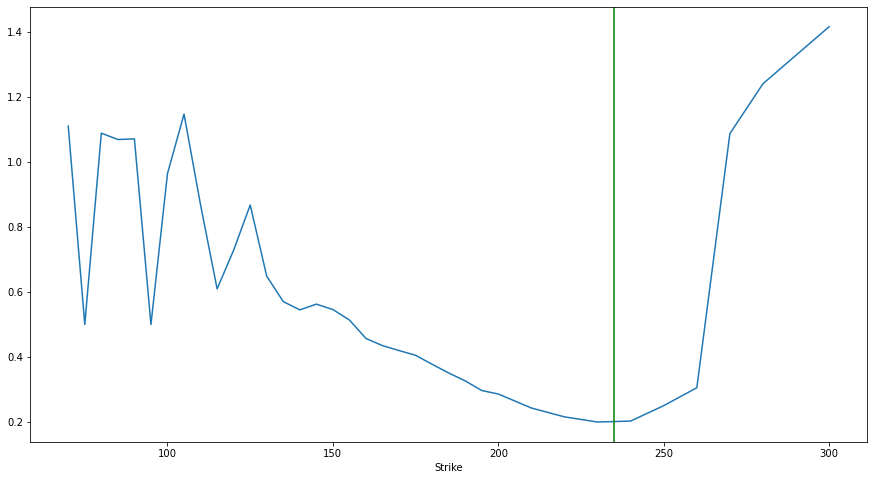

In [53]:
# Calculamos la Volatility smile para las opciones put

ax = put_mcd.set_index('Strike').loc[:, 'IV'].plot(figsize=(15,8))
ax.axvline(put_mcd.Underlying_Price.iloc[0], color='g');

In [54]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

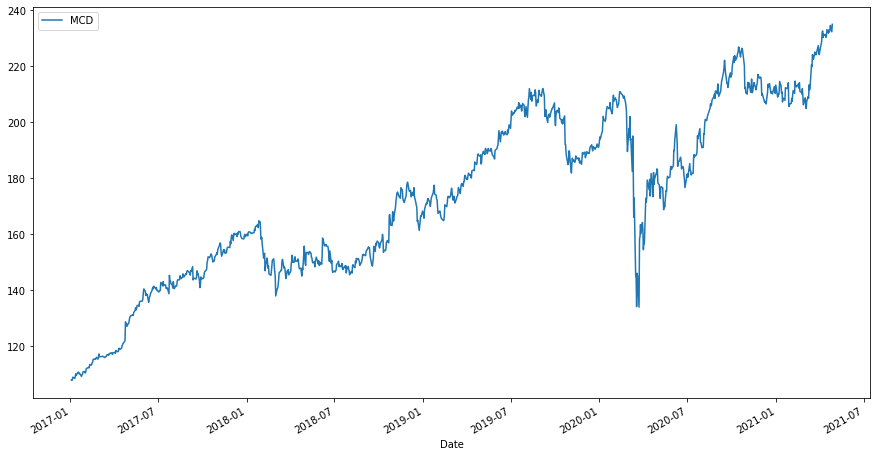

In [55]:
ticker = ['MCD']
start_date = '2017-01-01'

closes_mcd = get_adj_closes(ticker, start_date)
closes_mcd.plot(figsize=(15,8));
plt.legend(ticker);

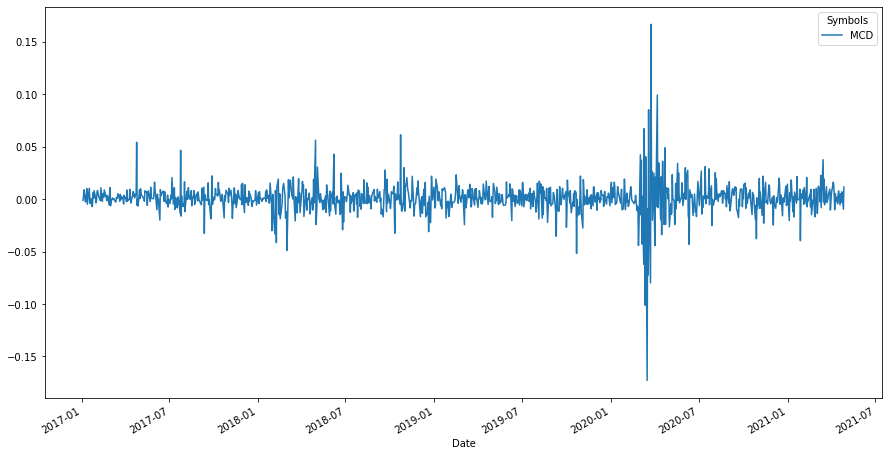

In [56]:
# Obtener los rendimientos logarítmicos de los precios ajustados al cierre

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

ret_mcd = calc_daily_ret(closes_mcd)
ret_mcd.plot(figsize=(15,8));

In [57]:
mcd = web.YahooOptions('MCD')
mcd_opt = mcd.get_all_data().reset_index()
mcd_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,212.5,call,MCD210430C00212500,...,2021-04-27 23:59:51,2021-04-27 18:39:33,"{'contractSymbol': 'MCD210430C00212500', 'stri..."
2021-04-30,180.0,put,MCD210430P00180000,...,2021-04-27 23:59:51,2021-04-21 17:09:44,"{'contractSymbol': 'MCD210430P00180000', 'stri..."
2021-04-30,252.5,call,MCD210430C00252500,...,2021-04-27 23:59:51,2021-04-27 19:12:26,"{'contractSymbol': 'MCD210430C00252500', 'stri..."
2021-04-30,227.5,put,MCD210430P00227500,...,2021-04-27 23:59:51,2021-04-27 19:34:35,"{'contractSymbol': 'MCD210430P00227500', 'stri..."
2021-04-30,255.0,call,MCD210430C00255000,...,2021-04-27 23:59:51,2021-04-27 19:39:58,"{'contractSymbol': 'MCD210430C00255000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,145.0,put,MCD230120P00145000,...,2021-04-27 23:59:51,2021-04-12 16:37:04,"{'contractSymbol': 'MCD230120P00145000', 'stri..."
2023-01-20,105.0,put,MCD230120P00105000,...,2021-04-27 23:59:51,2021-04-26 13:30:22,"{'contractSymbol': 'MCD230120P00105000', 'stri..."
2023-01-20,105.0,call,MCD230120C00105000,...,2021-04-27 23:59:51,2021-04-05 14:22:39,"{'contractSymbol': 'MCD230120C00105000', 'stri..."


In [58]:
mcd_opt.Underlying_Price[0]

234.85

In [82]:
K = 270 # strike price
indice_opt = mcd_opt.loc[(mcd_opt.Type=='call') & (mcd_opt.Strike==K) & (mcd_opt.Expiry=='2023-01-20')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
554,270.0,2023-01-20,call,...,2021-04-27 23:59:51,2021-04-27 19:03:03,"{'contractSymbol': 'MCD230120C00270000', 'stri..."


In [83]:
i_opt= indice_opt.index
opcion_valuar = mcd_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MCD230120C00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 9.65,
 'change': -0.35000038,
 'percentChange': -3.5000038,
 'volume': 2,
 'openInterest': 127,
 'bid': 8.7,
 'ask': 12.25,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619550183,
 'impliedVolatility': 0.19759408370971682,
 'inTheMoney': False}

In [84]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  234.85


### Simular precios usando rendimiento simple y logarítmico

Rendimiento simple

In [85]:
# Obtenemos el rendimiento simple
Ri = closes_mcd.pct_change(1).iloc[1:]

# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0] # tasa libre de riesgo
sigma_R = Ri.std()[0]
Ri.head()

Symbols,MCD
Date,
2017-01-04,-0.001
2017-01-05,0.002
2017-01-06,0.009
2017-01-09,-0.003
2017-01-10,-0.001


In [97]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today()) # Nos da el dia de hoy 

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq = 'B') # 'B' es para los días habiles
ndays = len(dates)

In [98]:
# Simular los rendimientos

# Rendimiento diario 
dt = 1
# Z ~ N(0,1) normal estándar (ndays, nscen)
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z * sigma_R * np.sqrt(dt) + mu_R * dt, index=dates)
Ri_dt

,0,1,2,...,9997,9998,9999
2021-04-27,-5.358e-03,0.015,0.014,...,-1.328e-02,-2.354e-02,0.019
2021-04-28,1.132e-02,-0.023,0.013,...,-9.116e-04,8.528e-03,0.014
2021-04-29,-9.470e-04,0.015,0.008,...,-1.492e-02,-4.291e-02,-0.016
2021-04-30,-6.548e-03,-0.020,0.025,...,-2.935e-03,-1.575e-02,0.018
2021-05-03,-8.809e-04,-0.009,0.013,...,-2.698e-04,6.426e-04,-0.008
...,...,...,...,...,...,...,...
2023-01-16,2.462e-03,0.011,0.002,...,-2.299e-02,5.472e-03,-0.003
2023-01-17,-3.230e-02,-0.019,0.024,...,6.903e-03,1.152e-02,-0.013
2023-01-18,-3.603e-03,0.005,-0.032,...,9.078e-03,-2.718e-02,-0.002
2023-01-19,-5.432e-03,0.006,0.012,...,2.161e-02,-4.506e-02,0.017


In [99]:
S0 = opcion_valuar.Underlying_Price # Spot Price
S_T = S0*(Ri_dt + 1).cumprod()

In [100]:
# Simulación del precio
S_0 = opcion_valuar.Underlying_Price
S_T.iloc[0,:] = S_0
S_T = S_0*(1+Ri_dt).cumprod()

S_T # estos son los precios simulados

,0,1,2,...,9997,9998,9999
2021-04-27,233.592,238.429,238.203,...,231.731,229.322,239.403
2021-04-28,236.235,233.008,241.213,...,231.519,231.278,242.788
2021-04-29,236.012,236.427,243.208,...,228.065,221.354,238.940
2021-04-30,234.466,231.781,249.388,...,227.395,217.867,243.202
2021-05-03,234.260,229.766,252.598,...,227.334,218.007,241.350
...,...,...,...,...,...,...,...
2023-01-16,486.186,343.722,402.952,...,260.163,410.252,409.000
2023-01-17,470.481,337.244,412.648,...,261.959,414.977,403.614
2023-01-18,468.786,338.991,399.356,...,264.337,403.700,402.845
2023-01-19,466.240,340.926,404.156,...,270.050,385.507,409.554


Rendimiento logarítmico

In [101]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_mcd)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_mcd.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()

In [102]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.015248065725481152, 0.015234393545435257)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(K - S_T,0)
$$

In [103]:
opcion_valuar['JSON']

{'contractSymbol': 'MCD230120C00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 9.65,
 'change': -0.35000038,
 'percentChange': -3.5000038,
 'volume': 2,
 'openInterest': 127,
 'bid': 8.7,
 'ask': 12.25,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619550183,
 'impliedVolatility': 0.19759408370971682,
 'inTheMoney': False}

### Valuación usando el modelo de Black and Scholes

Hallamos la media y desviación muestral de los renidmientos logarítmicos, aunque no vamos a tomar la media sino la tasa libre de riesgo a un año 

In [104]:
mu = ret_mcd.mean()[0]
sigma = ret_mcd.std()[0]
mu, sigma

(0.0007191303099428642, 0.015234393545435257)

In [105]:
# Tasa libre de riesgo a 1 año ---> 0.06
r = 0.06/360 # Tasa diaria

In [106]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10

len(dates)

454

In [107]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2021-04-27,0.019,0.001,-0.012,...,0.002,0.011,0.038
2021-04-28,0.023,-0.007,-0.015,...,-0.006,0.002,-0.003
2021-04-29,0.026,0.010,0.005,...,0.002,0.017,-0.021
2021-04-30,0.032,0.028,0.026,...,-0.018,-0.009,-0.031
2021-05-03,0.008,0.007,0.056,...,-0.034,0.011,-0.037
...,...,...,...,...,...,...,...
2023-01-16,0.587,0.005,0.225,...,-0.470,0.336,-0.467
2023-01-17,0.569,0.026,0.245,...,-0.457,0.339,-0.483
2023-01-18,0.567,0.029,0.249,...,-0.438,0.353,-0.490
2023-01-19,0.588,0.029,0.232,...,-0.466,0.368,-0.478


In [109]:
S0 = closes_mcd.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:] = S0
sim_closes

,0,1,2,...,7,8,9
2021-04-27,234.980,234.980,234.980,...,234.980,234.980,234.980
2021-04-28,240.422,233.356,231.543,...,233.489,235.343,234.265
2021-04-29,241.086,237.256,236.073,...,235.419,239.061,230.090
2021-04-30,242.594,241.611,241.079,...,230.766,232.790,227.880
2021-05-03,236.771,236.563,248.514,...,227.177,237.650,226.350
...,...,...,...,...,...,...,...
2023-01-16,422.597,236.045,294.352,...,146.822,328.877,147.248
2023-01-17,415.184,241.085,300.355,...,148.719,329.952,145.035
2023-01-18,414.124,241.998,301.396,...,151.666,334.564,143.889
2023-01-19,423.163,241.923,296.449,...,147.520,339.614,145.663


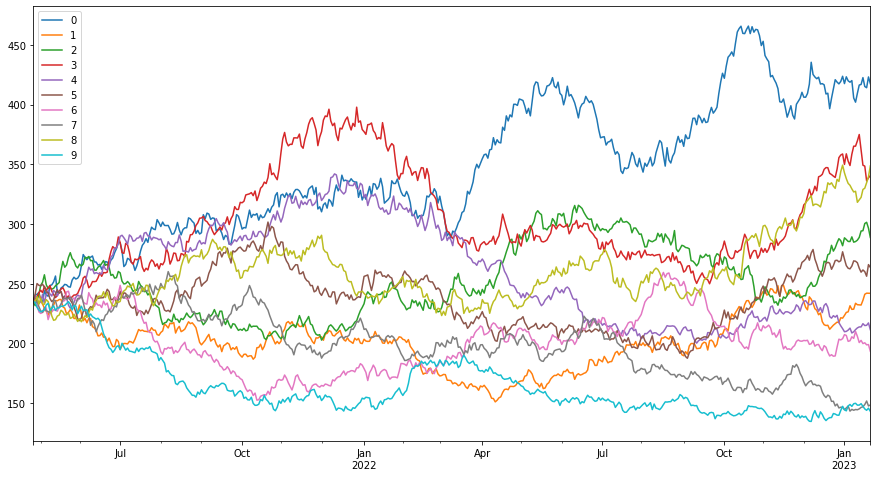

In [110]:
sim_closes.plot(figsize=(15,8));

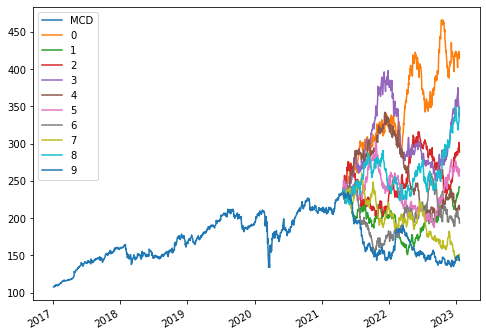

In [112]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_mcd,sim_closes]).plot(figsize=(8,6));

In [113]:
opcion_valuar['JSON'] #Queremos llegar a 270 (lastPrice)

{'contractSymbol': 'MCD230120C00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 9.65,
 'change': -0.35000038,
 'percentChange': -3.5000038,
 'volume': 2,
 'openInterest': 127,
 'bid': 8.7,
 'ask': 12.25,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619550183,
 'impliedVolatility': 0.19759408370971682,
 'inTheMoney': False}

In [114]:
from datetime import date
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_mcd.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())


TypeError: unsupported operand type(s) for *: 'float' and 'AxesSubplot'

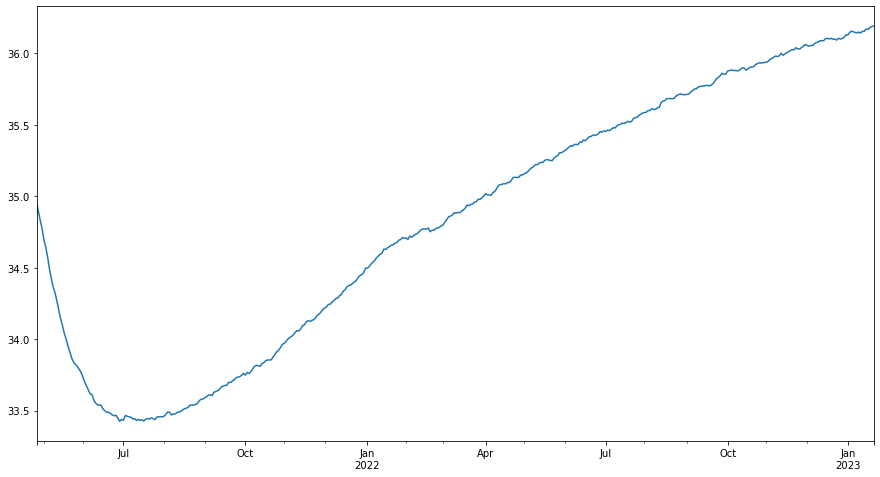

In [116]:
np.exp(-r * ndays) * np.fmax(K - sim_closes, 0).mean(axis=1).plot(figsize=(15,8));

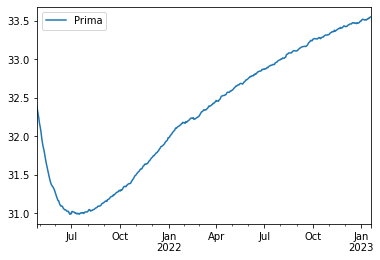

In [121]:
# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,0).mean(axis=1)}, index=dates)
put.plot();

In [123]:
put.iloc[-1]

Prima    33.554
Name: 2023-01-20 00:00:00, dtype: float64

In [125]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)


(32.83028329056874, 34.277432986766875)


### Valuación usando simulación: uso del histograma de rendimientos

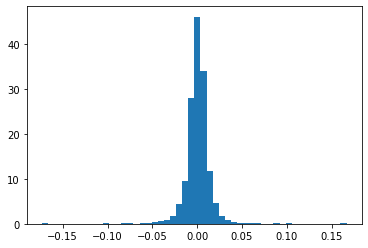

In [129]:
# rendimientos 
ren = calc_daily_ret(closes_mcd) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['MCD'], bins=50, density=True, label='Histograma rendimientos')

In [130]:
ndays = len(dates) 
nscen = 10

In [131]:
prob = y/np.sum(y)
values = x[1:]
prob.sum()

0.9999999999999998

In [132]:
#rendimientos simulados 
ret = np.random.choice(values, ndays*nscen, p=prob)

#fechas
dates = pd.date_range(start=Hoy,periods=ndays)
#rendimientos en dataframe
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-27,0.017,0.017,0.010,...,0.004,-0.003,-0.003
2021-04-28,0.010,0.058,0.010,...,0.010,0.017,-0.003
2021-04-29,-0.010,0.004,0.010,...,0.024,0.010,-0.003
2021-04-30,0.004,0.004,0.004,...,0.010,0.004,0.004
2021-05-01,0.004,-0.003,-0.010,...,-0.003,0.010,0.010
...,...,...,...,...,...,...,...
2022-07-20,0.010,-0.010,0.010,...,0.017,0.004,0.010
2022-07-21,0.004,-0.003,-0.010,...,0.010,0.031,0.004
2022-07-22,0.010,0.004,0.010,...,0.010,-0.003,0.017
2022-07-23,0.004,-0.003,0.017,...,0.044,-0.003,0.010


In [134]:
#simulamos los precios
sim_closes_hist = (closes_mcd.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-27,239.061,239.061,237.444,...,235.837,234.242,234.242
2021-04-28,241.568,253.325,239.934,...,238.310,238.310,233.506
2021-04-29,239.180,254.250,242.450,...,244.101,240.809,232.772
2021-04-30,240.053,255.177,243.334,...,246.661,241.688,233.621
2021-05-01,240.929,254.376,240.929,...,245.886,244.222,236.071
...,...,...,...,...,...,...,...
2022-07-20,1959.603,1367.422,1587.697,...,1598.512,1699.228,855.978
2022-07-21,1966.753,1363.126,1572.000,...,1615.274,1752.375,859.101
2022-07-22,1987.376,1368.100,1588.483,...,1632.211,1746.869,874.023
2022-07-23,1994.628,1363.801,1616.074,...,1706.273,1741.381,883.188


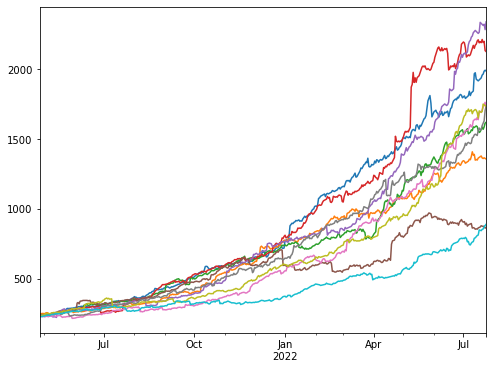

In [135]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

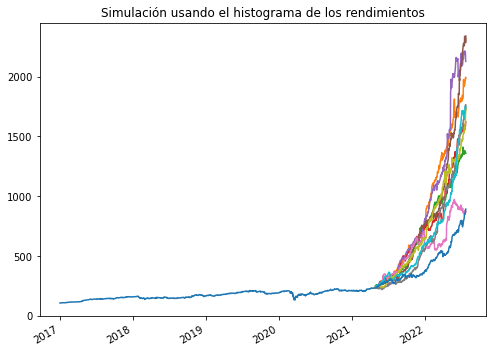

In [137]:
pd.concat([closes_mcd,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [140]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_mcd+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_mcd.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

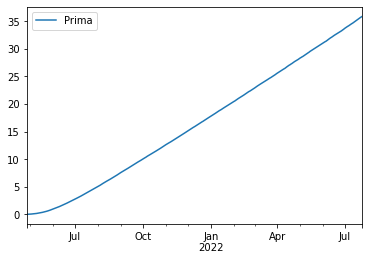

In [141]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [142]:
call_hist.iloc[-1]

Prima    35.838
Name: 2022-07-24 00:00:00, dtype: float64

In [143]:
opcion_valuar['JSON']

{'contractSymbol': 'MCD230120C00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 9.65,
 'change': -0.35000038,
 'percentChange': -3.5000038,
 'volume': 2,
 'openInterest': 127,
 'bid': 8.7,
 'ask': 12.25,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619550183,
 'impliedVolatility': 0.19759408370971682,
 'inTheMoney': False}

In [145]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(35.269410166799574, 36.40566527552208)


### Conclusión

Podemos observar que el valor teórico de la prima en Black-Scholes es de 33.554 con un intérvalo de confianza de un 95%. El valor de la prima encontrada utilizando el histograma de los rendimientos es de 35.838, igualmente se utilizó un intérvalo de confianza del 95%. 